## Ejercicio Test Chi-Cuadrado

### Tabla de Frecuencias Observadas

| **Origen del tráfico** | **Electrónica** | **Ropa** | **Hogar** | **Total** |
|------------------------|----------------|----------|-----------|-----------|
| Orgánico              | 30             | 50       | 40        | 120       |
| Pago por clic         | 40             | 30       | 60        | 130       |
| Redes Sociales        | 20             | 40       | 90        | 150       |
| **Total**             | 90             | 120      | 190       | 400       |

---

### **Cálculo de las Frecuencias Esperadas**

Las frecuencias esperadas se calculan utilizando la fórmula:

$$
E_{ij} = \frac{\text{(Total de la fila i)} \times \text{(Total de la columna j)}}{\text{Total general}}
$$

1. **Frecuencia esperada para la celda (Orgánico, Electrónica):**
   $$
   E_{11} = \frac{(120 \times 90)}{400} = 27
   $$

2. **Frecuencia esperada para la celda (Orgánico, Ropa):**
   $$
   E_{12} = \frac{(120 \times 120)}{400} = 36
   $$

3. **Frecuencia esperada para la celda (Orgánico, Hogar):**
   $$
   E_{13} = \frac{(120 \times 190)}{400} = 57
   $$

4. Se repite este cálculo para todas las celdas.

### Tabla de Valores Esperados

| **Origen del tráfico** | **Electrónica (E)** | **Ropa (E)** | **Hogar (E)** | **Total** |
|------------------------|--------------------|--------------|---------------|-----------|
| Orgánico              | 27.00             | 36.00        | 57.00         | 120       |
| Pago por clic         | 29.25             | 39.00        | 61.75         | 130       |
| Redes Sociales        | 33.75             | 45.00        | 71.25         | 150       |
| **Total**             | 90                | 120          | 190           | 400       |

---

### **Cálculo del Estadístico \( \chi^2 \)**

La fórmula para calcular \( \chi^2 \) es:

$$
\chi^2 = \sum \frac{(O_{ij} - E_{ij})^2}{E_{ij}}
$$

Donde:
- $O_{ij}$: Frecuencias observadas.
- $E_{ij}$: Frecuencias esperadas.

1. **Para la celda (Orgánico, Electrónica):**
   $$
   \chi^2_{11} = \frac{(30 - 27)^2}{27} = \frac{3^2}{27} = 0.33
   $$

2. **Para la celda (Orgánico, Ropa):**
   $$
   \chi^2_{12} = \frac{(50 - 36)^2}{36} = \frac{14^2}{36} = 5.44
   $$

3. **Para la celda (Orgánico, Hogar):**
   $$
   \chi^2_{13} = \frac{(40 - 57)^2}{57} = \frac{(-17)^2}{57} = 5.07
   $$

4. Se repite este cálculo para todas las celdas, y luego se suma.

### Suma Total del Estadístico

$$
\chi^2 = 0.33 + 5.44 + 5.07 + \dots = 28.02
$$

---

### **Interpretación del Resultado**

1. **Grados de Libertad (\( \text{dof} \)):**
   $$
   \text{dof} = (\text{número de filas} - 1) \times (\text{número de columnas} - 1) = (3 - 1) \times (3 - 1) = 4
   $$

2. **Umbral Crítico (para \( \alpha = 0.05 \)):**
   De la tabla $\chi^2$, el valor crítico para 4 grados de libertad es aproximadamente **9.49**.

3. **Conclusión:**
   - Como $\chi^2 = 28.02$ es mayor que el umbral crítico \( 9.49 \), rechazamos la hipótesis nula.
   - **Interpretación:** Existe una relación significativa entre el origen del tráfico y la categoría de producto comprada.


Cálculo manual:
Valor de chi-cuadrado (manual): 28.02
Usando scipy:
Valor de chi-cuadrado (scipy): 28.02
P-valor: 0.00001
Grados de libertad: 4


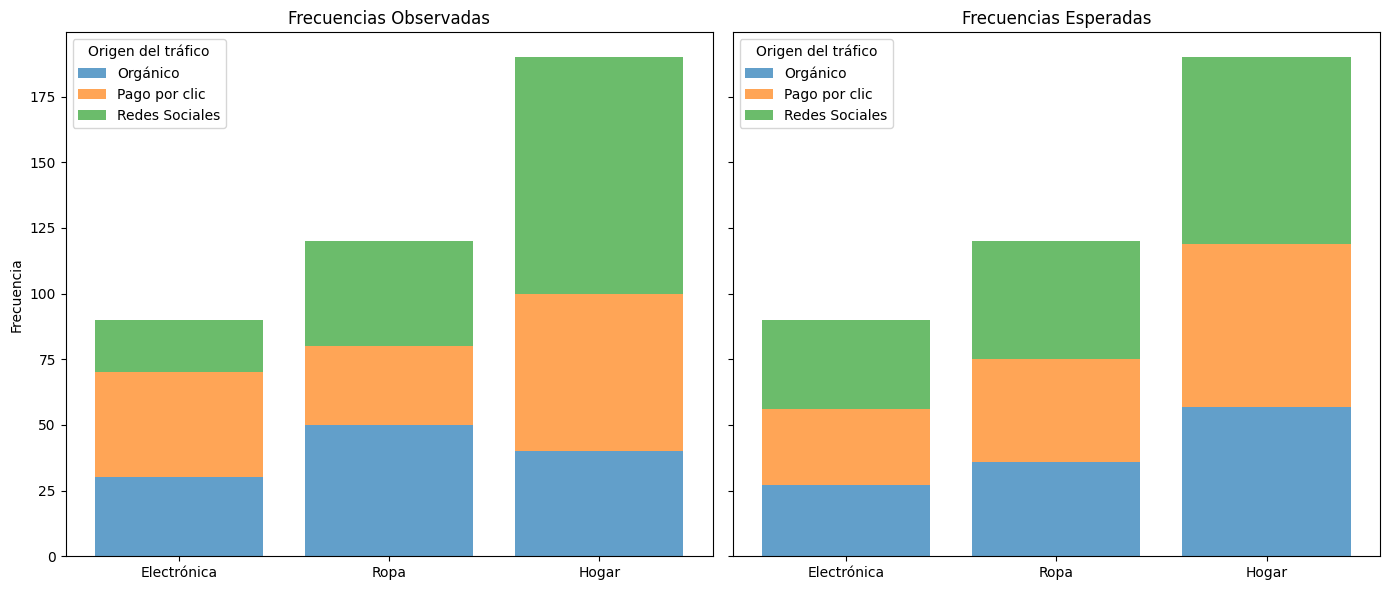

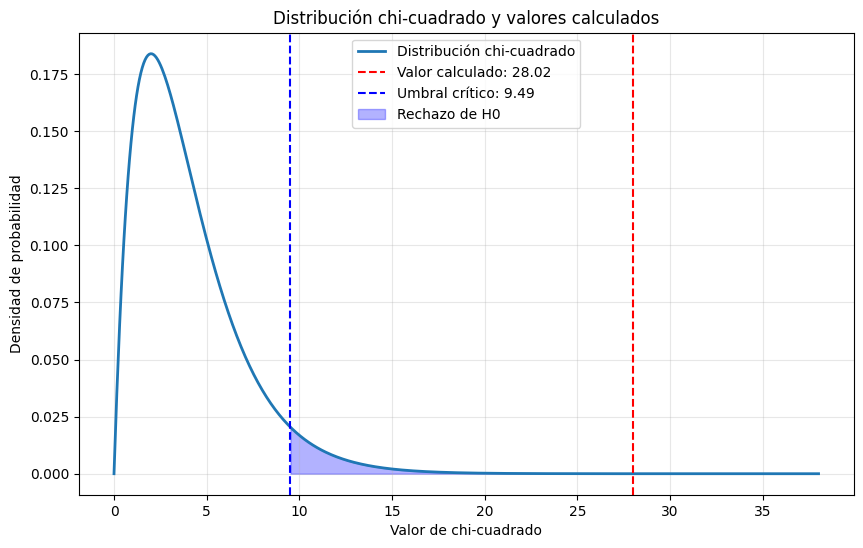

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, chi2_contingency

# Datos observados
observed = np.array([
    [30, 50, 40],  # Orgánico
    [40, 30, 60],  # Pago por clic
    [20, 40, 90]   # Redes Sociales
])

# Totales
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
total = observed.sum()

# Cálculo manual de frecuencias esperadas
expected = np.outer(row_totals, col_totals) / total

# Cálculo manual de chi-cuadrado
chi_squared_manual = np.sum((observed - expected) ** 2 / expected)

# Usando scipy para calcular chi-cuadrado, p-valor y grados de libertad
chi_squared, p_value, dof, expected_scipy = chi2_contingency(observed)

# Validación
print("Cálculo manual:")
print(f"Valor de chi-cuadrado (manual): {chi_squared_manual:.2f}")
print("Usando scipy:")
print(f"Valor de chi-cuadrado (scipy): {chi_squared:.2f}")
print(f"P-valor: {p_value:.5f}")
print(f"Grados de libertad: {dof}")

# Gráficos de barras (frecuencias observadas y esperadas)
categories = ["Electrónica", "Ropa", "Hogar"]
traffic_sources = ["Orgánico", "Pago por clic", "Redes Sociales"]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Frecuencias observadas
axes[0].bar(categories, observed[0], label="Orgánico", alpha=0.7)
axes[0].bar(categories, observed[1], label="Pago por clic", alpha=0.7, bottom=observed[0])
axes[0].bar(categories, observed[2], label="Redes Sociales", alpha=0.7,
            bottom=observed[0] + observed[1])
axes[0].set_title("Frecuencias Observadas")
axes[0].set_ylabel("Frecuencia")
axes[0].legend(title="Origen del tráfico")

# Frecuencias esperadas
axes[1].bar(categories, expected[0], label="Orgánico", alpha=0.7)
axes[1].bar(categories, expected[1], label="Pago por clic", alpha=0.7, bottom=expected[0])
axes[1].bar(categories, expected[2], label="Redes Sociales", alpha=0.7,
            bottom=expected[0] + expected[1])
axes[1].set_title("Frecuencias Esperadas")
axes[1].legend(title="Origen del tráfico")

plt.tight_layout()
plt.show()

# Gráfico de distribución chi-cuadrado
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)
x = np.linspace(0, chi_squared + 10, 500)
y = chi2.pdf(x, dof)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Distribución chi-cuadrado", lw=2)
plt.axvline(chi_squared, color="red", linestyle="--", label=f"Valor calculado: {chi_squared:.2f}")
plt.axvline(critical_value, color="blue", linestyle="--", label=f"Umbral crítico: {critical_value:.2f}")
plt.fill_between(x, y, where=(x >= critical_value), color="blue", alpha=0.3, label="Rechazo de H0")
plt.title("Distribución chi-cuadrado y valores calculados")
plt.xlabel("Valor de chi-cuadrado")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()